# ECommerce Churn Prediction - KSA Project

# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import missingno as msno

from sklearn.preprocessing import StandardScaler, OrdinalEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, f1_score,roc_curve

# Creating Functions

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

def get_insight(df):
    print("Dataset shape: \n", df.shape)
    
    print("\nDataset Information: \n", df.info())
    
    print("\nDataset sample:\n", df.head().T)
    
    print("\nDataset summary:\n", df.describe(include = 'all').T)

        
    print("\nNan/Null Values:")
    if df.isna().any().any() or df.isnull().any().any():
          
        print(f"This DataFrame contains Nan/Null Values.\n")
    else:
        print("This data does not contain any Nan/Null value.\n")
    print("\nDuplicated Values:")
    if df.duplicated().any():
        print(f"This DataFrame contains Duplicate Values.\n")
    else:
        print("This data does not contain any Duplicte value.")

In [3]:
def cat_cols(df):
    cat_col = df.select_dtypes(include = 'object')
    return cat_col

def num_cols(df):
    num_col = df.select_dtypes(exclude = 'object')
    return num_col


# Loading Dataset

In [4]:
df = pd.read_excel('Downloads/E Commerce Dataset.xlsx', sheet_name='E Comm')

# Understanding Dataset

In [5]:
get_insight(df)

Dataset shape: 
 (5630, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   obj

In [6]:
df.drop(['CustomerID'], axis = 1, inplace = True)

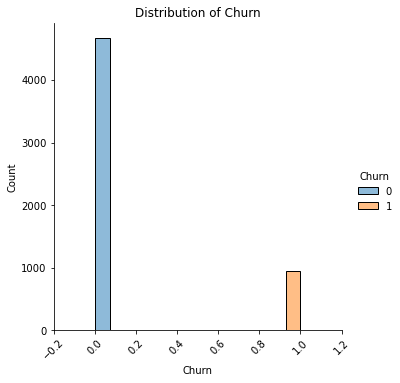

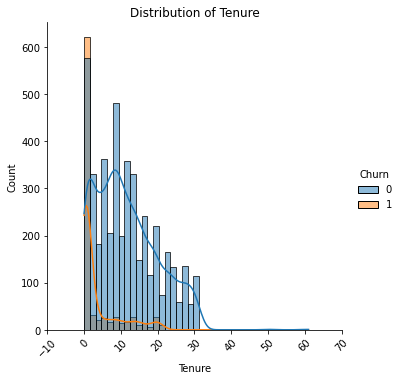

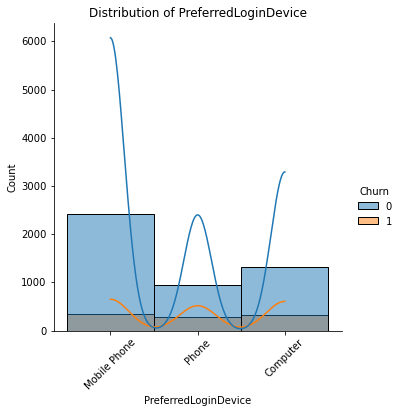

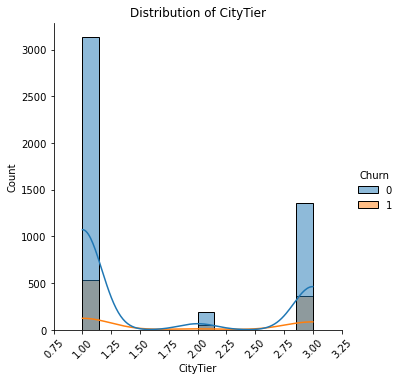

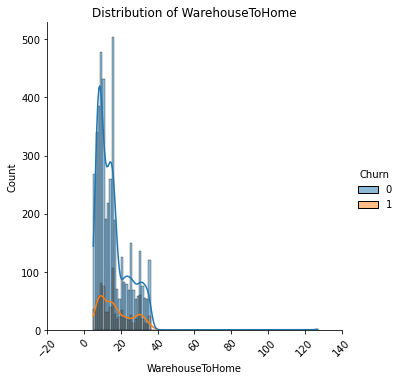

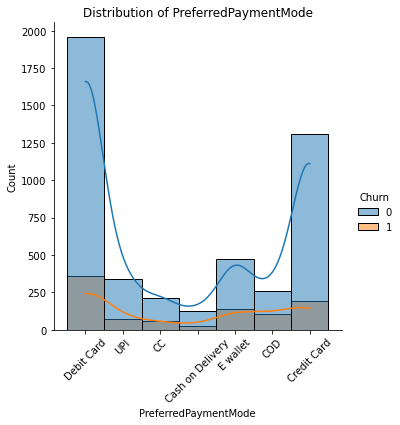

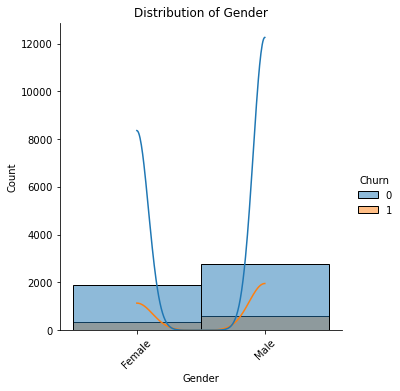

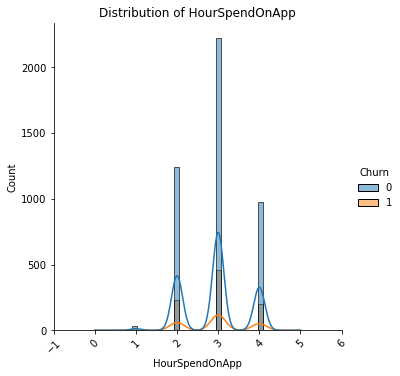

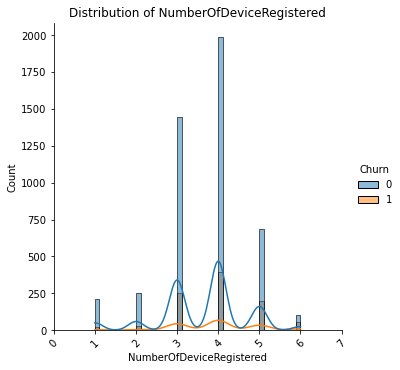

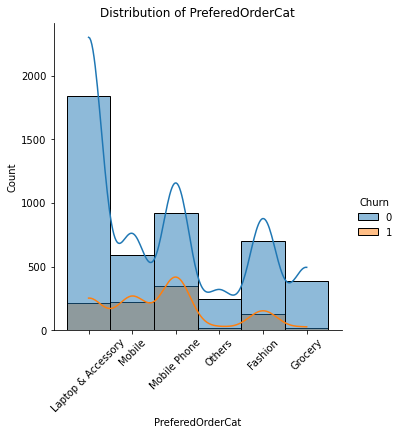

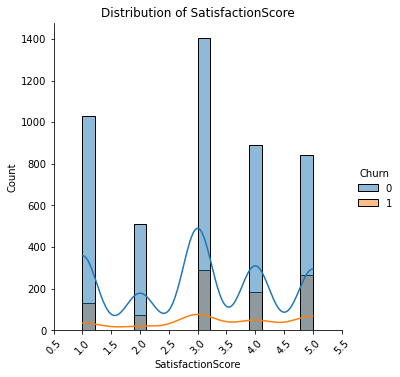

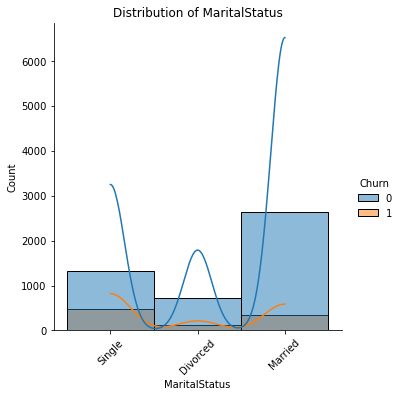

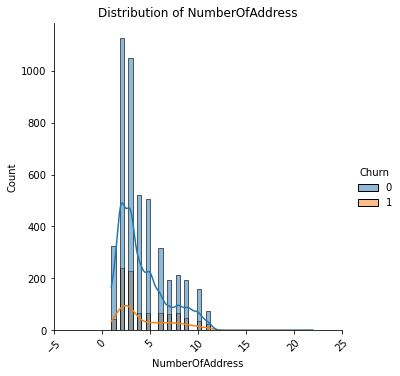

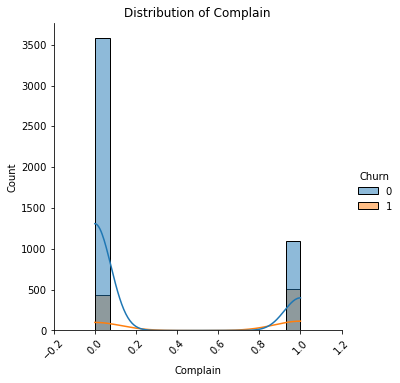

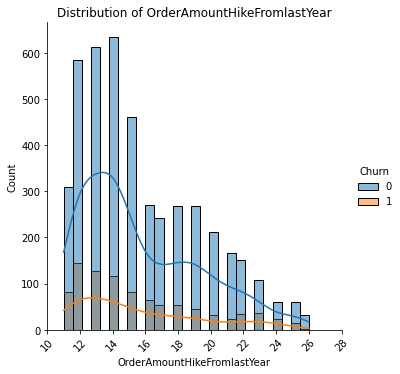

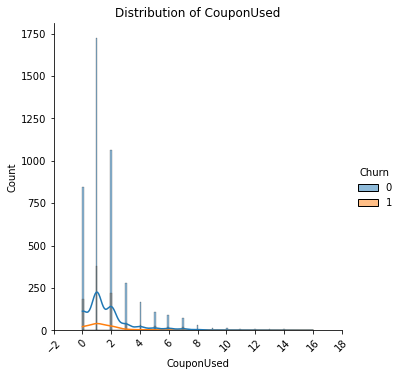

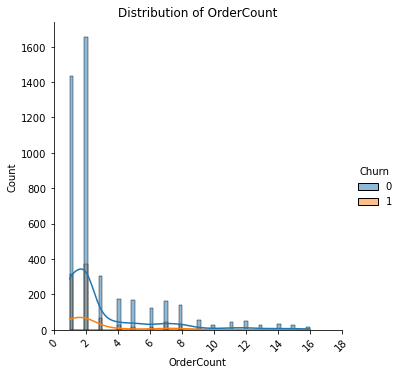

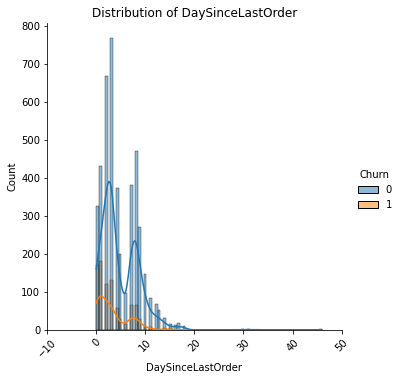

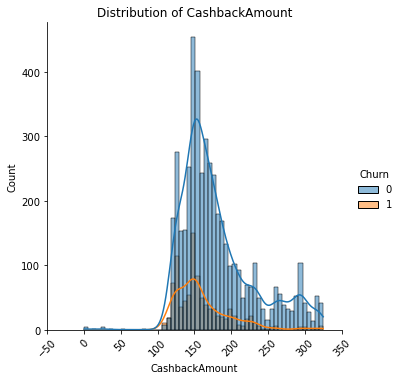

In [7]:
for i in df.columns:
    sns.displot(x=df[i],kde=True, data=df, hue = 'Churn').set_xticklabels(rotation=45)
    plt.title(f'Distribution of {i}')
    plt.show()

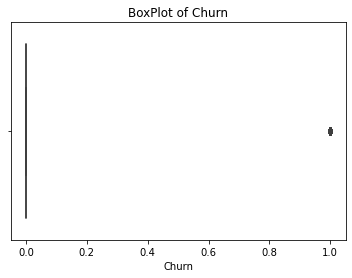

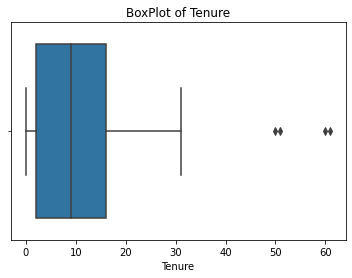

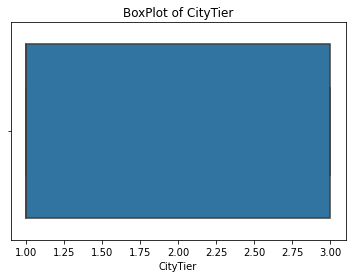

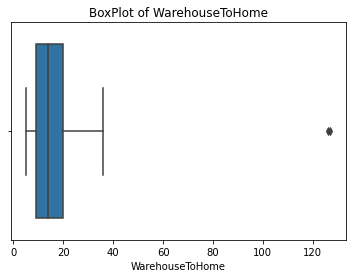

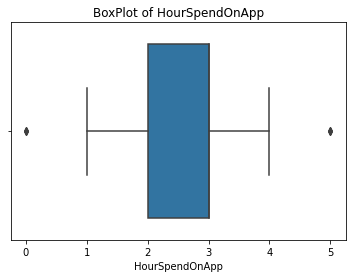

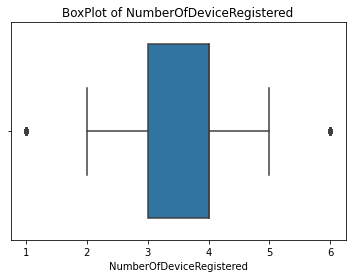

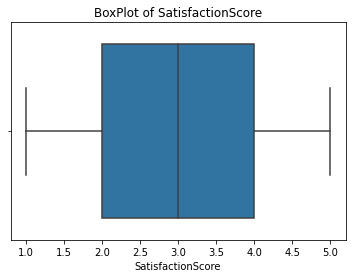

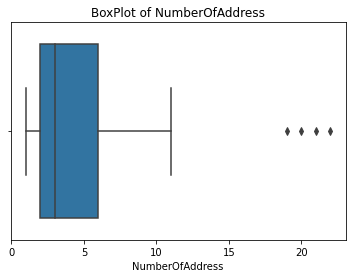

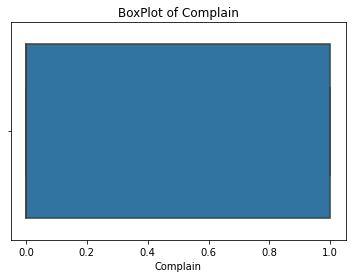

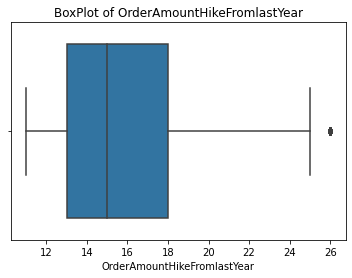

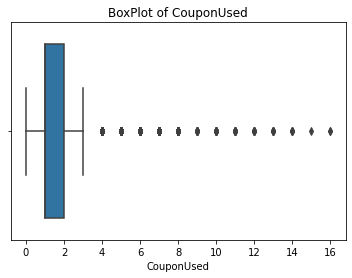

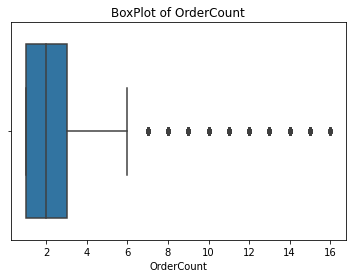

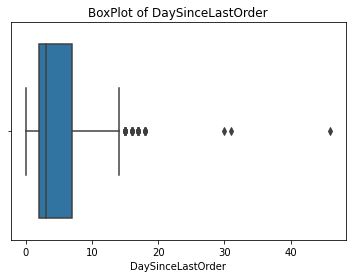

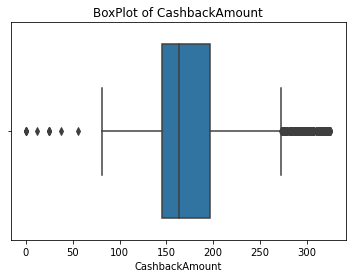

In [8]:
for i in num_cols(df).columns:
    sns.boxplot(x=df[i], data=df)
    plt.title(f'BoxPlot of {i}')
    plt.show()

# Encodind Categorical Columns

In [9]:
OE = OrdinalEncoder()
for i in cat_cols(df):
    df[[i]] = OE.fit_transform(df[[i]])

In [10]:
X =df.drop(['Churn'],axis=1)
y = df['Churn']

# Scaling Features

In [11]:
SC = StandardScaler()
Scaled_df = SC.fit_transform(X)

In [12]:
df_scaled = pd.DataFrame(Scaled_df, columns=X.columns)

In [13]:
y = y.replace(0,-1)

In [14]:
y = pd.DataFrame(y, columns=['Churn'])

In [15]:
X.shape

(5630, 18)

In [16]:
y.shape

(5630, 1)

In [17]:
DF = pd.concat([df_scaled,y],axis = 1)

In [18]:
DF.shape

(5630, 19)

# Filtering Outliers

In [19]:
z_scores = DF.apply(stats.zscore)

threshold = 3

outlier_indices = (np.abs(z_scores) > threshold).any(axis=1)

In [20]:
df_filtered = DF[~outlier_indices]

In [21]:
df_filtered.shape

(5615, 19)

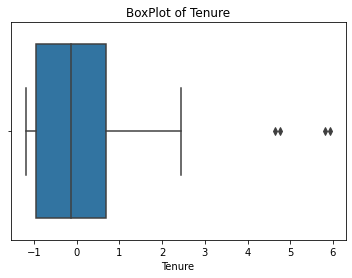

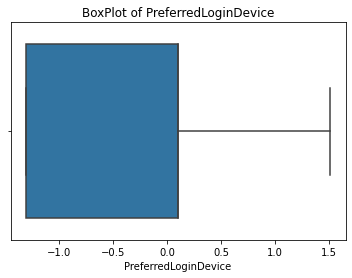

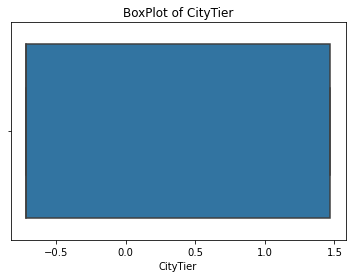

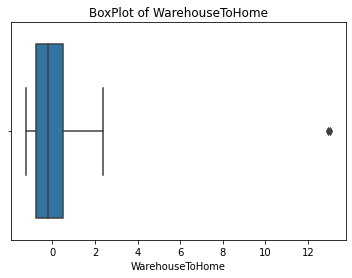

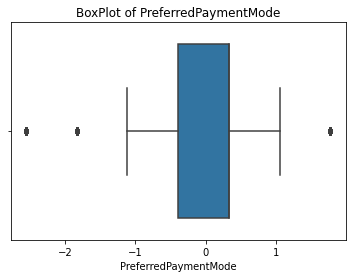

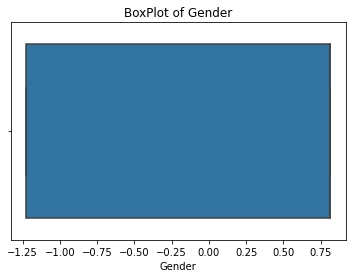

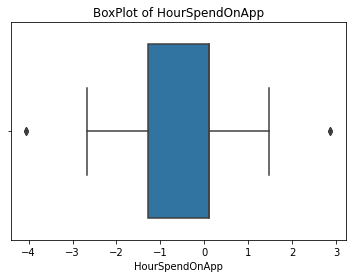

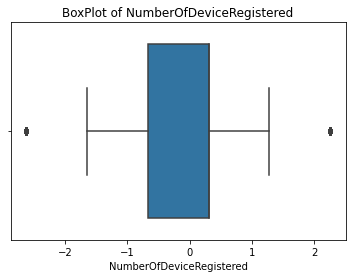

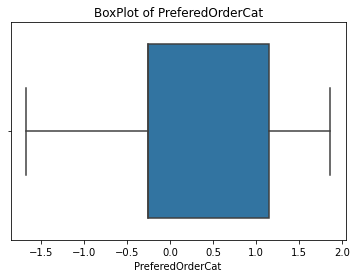

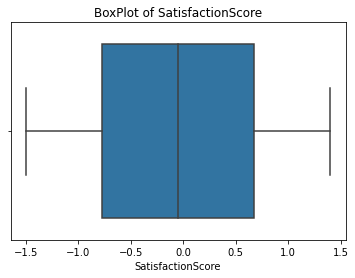

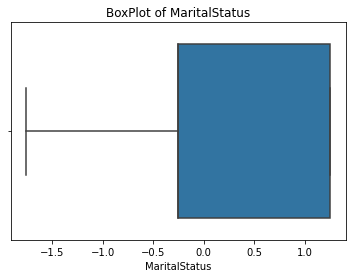

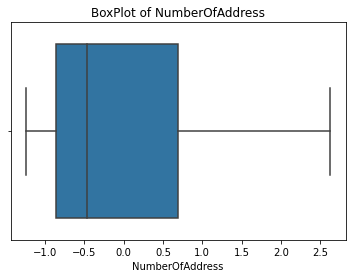

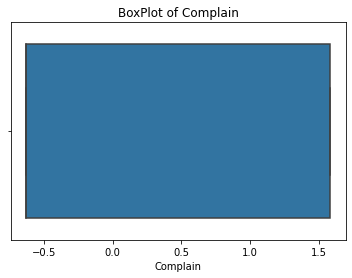

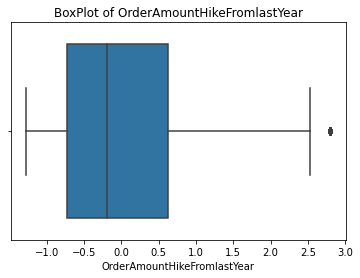

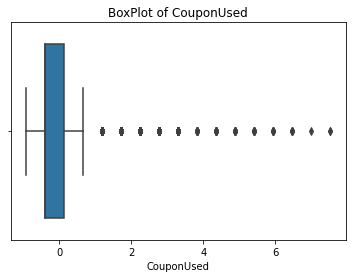

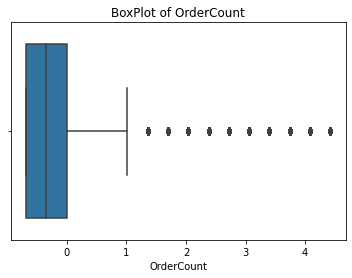

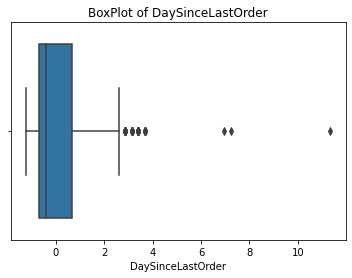

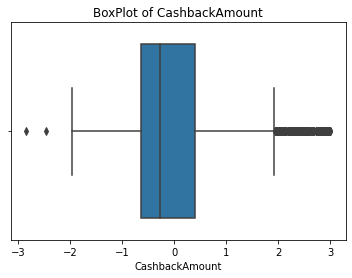

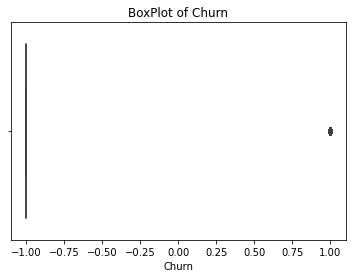

In [22]:
for i in num_cols(df_filtered).columns:
    sns.boxplot(x=df_filtered[i], data=df_filtered)
    plt.title(f'BoxPlot of {i}')
    plt.show()

# Missing Values Handling

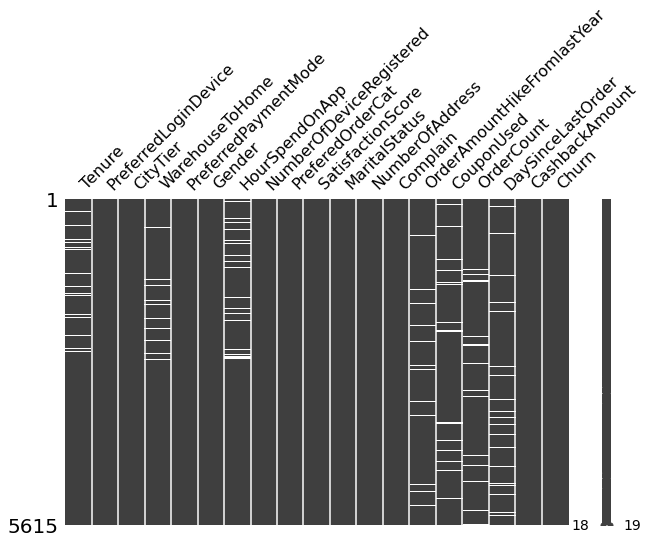

In [23]:
msno.matrix(df_filtered, figsize=(10,6))
plt.show()

In [24]:
df_fin = df_filtered.copy()

In [25]:
df_fin.fillna(df_filtered.median(), inplace = True)

In [26]:
df_fin.isna().sum()

Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
Churn                          0
dtype: int64

In [27]:
X = df_fin.drop(['Churn'], axis = 1)
y = df_fin['Churn']

# Model Building

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [29]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model Testing

In [30]:
accuracy = accuracy_score(y_test, y_pred)
CR = classification_report(y_test, y_pred)
CM = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Displaying Result

In [31]:
print("="*60)
print(f"Accuracy: {accuracy:.4f}")
print("="*60)
print(f"Classification Report:\n {CR}")
print("="*60)
print(f"Confusion Matrix: {CM}")
print("="*60)
print(f"F1 Score: {f1:.4f}")
print("="*60)
print(f"ROC AUC Score: {roc_auc:.4f}")
print("="*60)

Accuracy: 0.8638
Classification Report:
               precision    recall  f1-score   support

          -1       0.89      0.95      0.92       929
           1       0.66      0.43      0.52       194

    accuracy                           0.86      1123
   macro avg       0.78      0.69      0.72      1123
weighted avg       0.85      0.86      0.85      1123

Confusion Matrix: [[886  43]
 [110  84]]
F1 Score: 0.5234
ROC AUC Score: 0.6934


<AxesSubplot:>

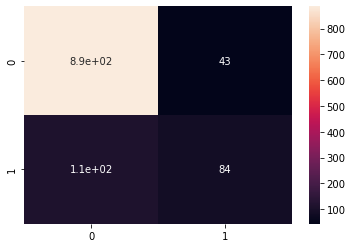

In [32]:
sns.heatmap(CM, annot = True)

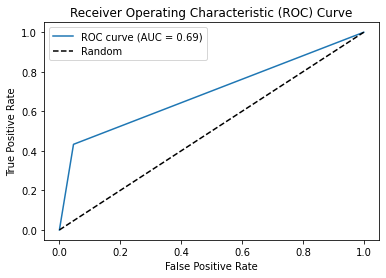

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


The overall accuracy of this model is 86.38%, which is pretty good.
It got 886 out of 929 negative samples right and 84 out of 194 positive samples. This means it's better at predicting the negative class than the positive one.
The precision for the negative class is 89%, which is pretty high. This means that out of all the samples predicted as negative, 89% were actually negative. The precision for the positive class is 66%, which isn't as good. It means that out of all the samples predicted as positive, only 66% were actually positive.
The recall for the negative class is 95%, which is really good. This means that out of all the actual negative samples, the model correctly predicted 95%. However, the recall for the positive class is only 43%, which isn't great. This means that out of all the actual positive samples, the model only correctly predicted 43%.
The F1 score for the positive class is 0.5234, which isn't too high. It's a measure of how accurate the model is at predicting the positive class.
The ROC AUC score is 0.6934, which is okay but not amazing. It's a measure of how well the model distinguishes between the two classes.
Overall, the model is pretty good at predicting the negative class, but not so good at predicting the positive class.